In [1]:
import numpy as np
import matplotlib.pyplot as plt
import clima_anom as ca
import cartopy
import cartopy.crs as ccrs

In [2]:
data_dir = '../data/Hgt_500hPa_Anomalies_Jan80_Dec83.nc'

data = ca.read_netcdf(data_dir,2)
lat = data['lat']
lon = data['lon']
hgt = data['var']

lat : (73,)
lon : (144,)
time : (48,)
var : (48, 73, 144)


In [3]:
test = ca.extract_shapefile('../shp/continent.shp',hgt,lat,lon)

In [4]:
lon2d, lat2d = np.meshgrid(lon, lat)

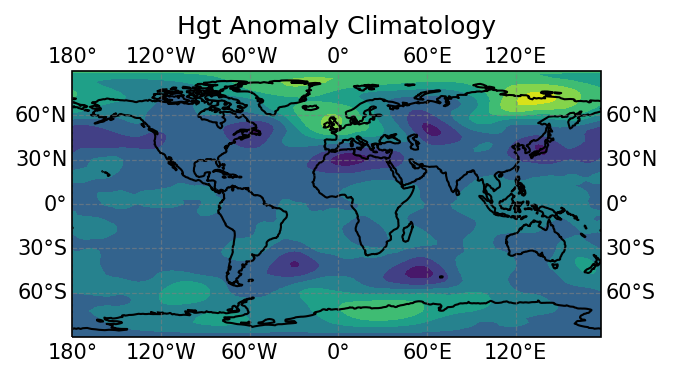

In [5]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,6),dpi=150)
ax1 = plt.subplot(2,2,1, projection = proj)

ax1.coastlines()
a1 = ax1.contourf(lon2d, lat2d, hgt[0,:,:],levels=None)
ax1.title.set_text('Hgt Anomaly Climatology')
gl = ax1.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')

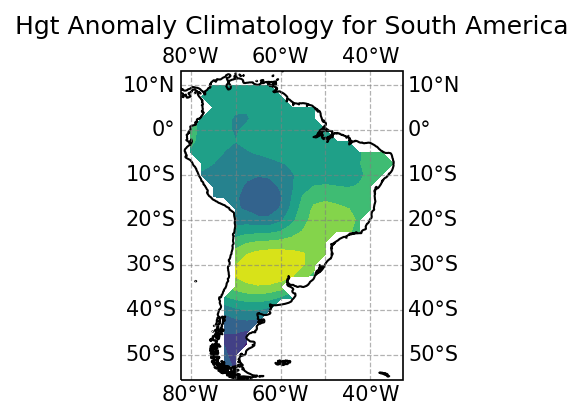

In [6]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,6),dpi=150)
ax1 = plt.subplot(2,2,1, projection = proj)

ax1.coastlines()
a1 = ax1.contourf(lon2d, lat2d, test[0,:,:],levels=None)
ax1.title.set_text('Hgt Anomaly Climatology for South America')
gl = ax1.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')